# Notebook for the exercises in Chapter 2 of the ML book

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# functions that download and load the data for the exercies
import func_getdata

In [3]:
func_getdata.fetch_housing_data()

In [4]:
housing_data = func_getdata.load_housing_data()

In [5]:
import pandas as pd

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe90e50>,
      dtype=object)

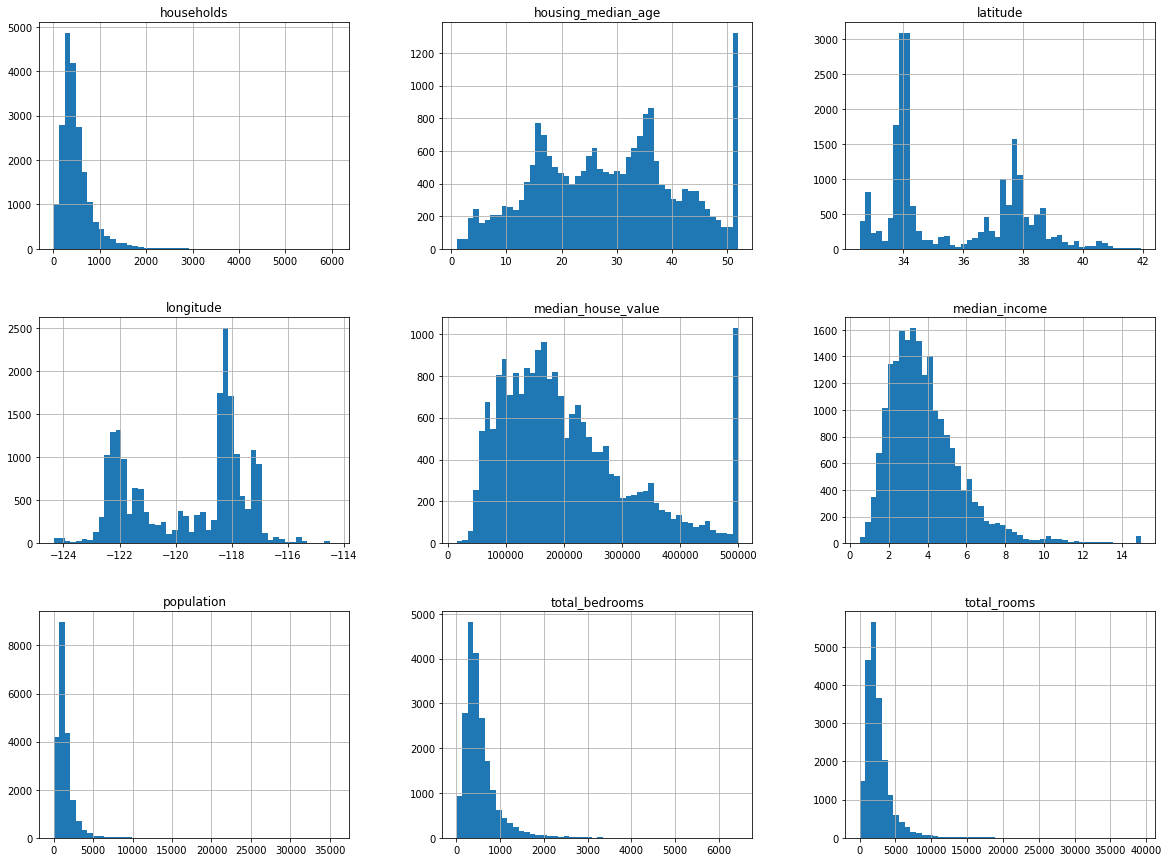

In [10]:
housing_data.hist(bins=50,figsize=(20,15))

In [11]:
from sklearn.model_selection import train_test_split

train_test_split can divide data into training and testing sets. This method is fine for large datasets.
If it is small, there might be biases 

In [12]:
train_set, test_set = train_test_split(housing_data,test_size=0.2,random_state=42)

An example of bias is seen in the median income. There are incomes that go beyond 6 ($60,000). 

We are gonna reduce this variable

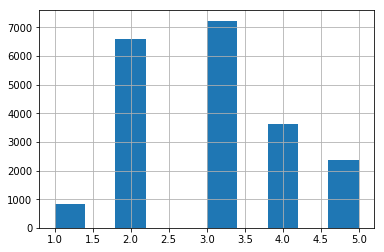

In [13]:

housing_data["income_cat"] = np.ceil(housing_data["median_income"]/1.5)
housing_data["income_cat"].where(housing_data["income_cat"]<5,5.0,inplace=True)
housing_data["income_cat"].hist()

Now we can do stratified sampling selection

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [16]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Putting the data back to original state

In [17]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [18]:
housing = strat_train_set.copy() #creating a copy to not harm the data set. 

Gonna do some plot visualizations

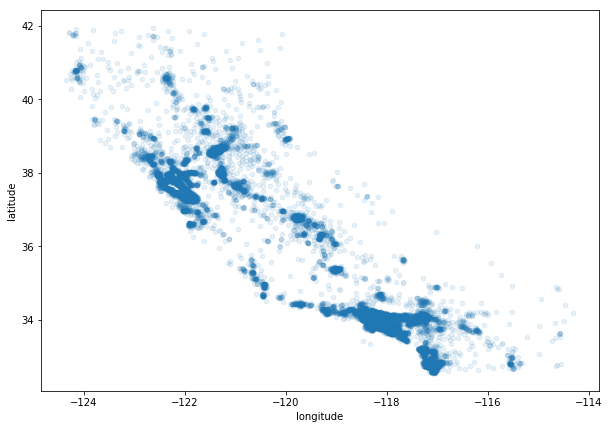

In [19]:
rcParams['figure.figsize']=10,7
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

The option `alpha` let us see the high-density areas

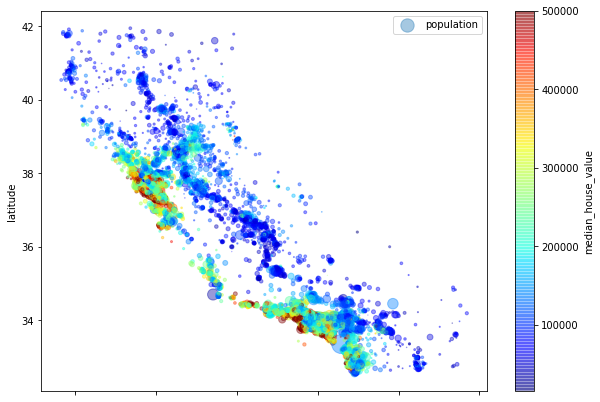

In [20]:
housing.plot(kind='scatter',x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",\
             c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True,figsize=(10,7))
legend()

Previous plot shows which areas has the mos expensive house values. The size of the scatter dots is given by the population value (/100).

## Correlations

Pandas has a correlation function `.corr()` that gives _Pearson's r_

In [21]:
corr_matrix=housing.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3c4650>,
      dtype=object)

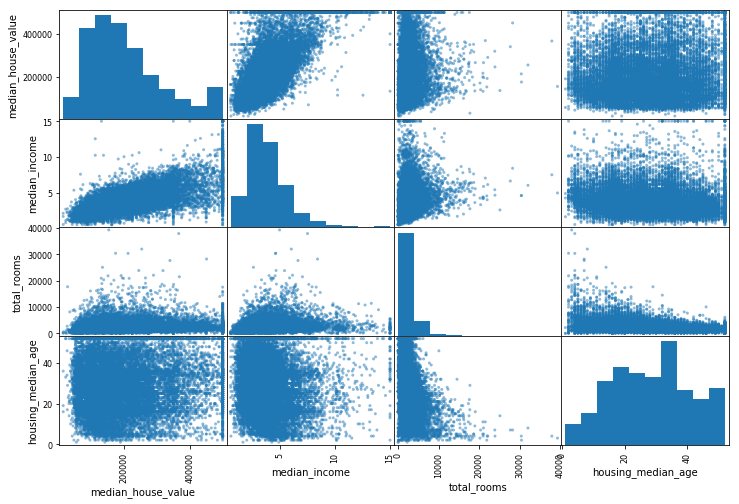

In [22]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

Pandas shows the distribution of the values in the diagonal, to not show a line.

Most useful relation is *median_income* and *median_house_value*

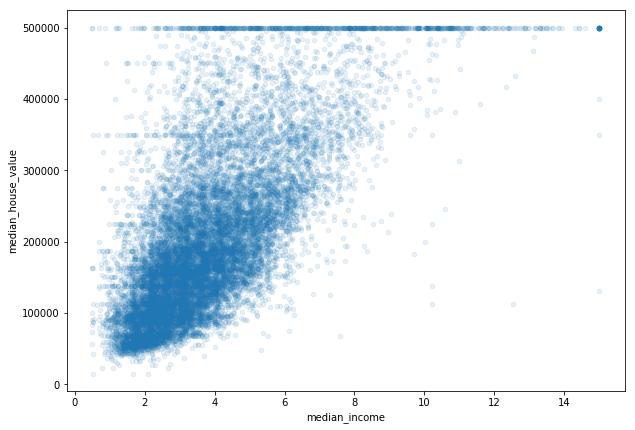

In [23]:
housing.plot(kind='scatter',x="median_income",y="median_house_value",alpha=0.1)

Creating useful ratios to look at. This is an extra step before doing machine learning. This quantites should make more sense such as total rooms per household, total bedrooms per rooms and total population per household. 

ALWAYS sanitize data

In [24]:
housing["rooms_per_household"] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_room'] = housing['population']/housing['households']

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) #correlation with respect median house value

median_house_value     1.000000
median_income          0.687160
rooms_per_household    0.146285
total_rooms            0.135097
housing_median_age     0.114110
households             0.064506
total_bedrooms         0.047689
population_per_room   -0.021985
population            -0.026920
longitude             -0.047432
latitude              -0.142724
bedrooms_per_room     -0.259984
Name: median_house_value, dtype: float64

## Machine Learning Section

Now let's prepare for Machine Learning. 

Starting a fresh and separatin  the predictors and labels since we don't want to apply the same transformations to the predictor and target values. 

In [26]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

We need to take care of missing features.

Options:  
* Get rid of the whole attribute
* Set the values to some value (zero, mean, median, etc.)
* Get rid of the corresponding district (special for this dataset)

In [27]:
# Using pandas methods
# housing.dropna(subset=['total_bedrooms']) #option 3
# housing.drop('total_bedrooms',axis=1) #option1
# median = housing('total_bedrooms').median() # option 2
# housing['total_berooms'].fillna(median,inplace=True)

In [28]:
# Using sklearn
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

/Users/hugo/Software/miniconda2/envs/st_test/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [31]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
x=imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns = housing_num.columns)

In [33]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Machine learning prefers to work with numbers. Categories can be transformed into numbers using `factorize` from `pandas`

In [34]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [35]:
housing_categories

Index([u'<1H OCEAN', u'NEAR OCEAN', u'INLAND', u'NEAR BAY', u'ISLAND'], dtype='object')

Other forms of categorizing is using a _One hot encoder_. Some categoris are closer to each other, so it's better to have a binary division

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

/Users/hugo/Software/miniconda2/envs/st_test/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom transformations

The transformation done before can be implemented in a class after inheriting some of the classes from sklearn. See example below

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

In [38]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]  / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

Sckit-learn provides _min-max_ (or _normalization_) to scale features from 0-1. Function `MinMaxScaler` does this.
$$ Q' = (Q-minQ)/(maxQ-minQ) $$

Another scaling procedure is _standardization_. This procedure doesn't bound the variable to a range but is not affected by outliers. Function `StandardScaler` does this.
$$ Q' = (Q-\left<Q\right>)/\sigma_{Q} $$



## Pipelines

Scikit-Learn with transformation using `Pipeline` class.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, CategoricalEncoder, OneHotEncoder

num_pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

/Users/hugo/Software/miniconda2/envs/st_test/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
from sklearn.base import BaseEstimator, TransformerMixin, 

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [42]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [50]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('cat_encoder',OneHotEncoder()),
])

/Users/hugo/Software/miniconda2/envs/st_test/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [51]:
from sklearn.pipeline import FeatureUnion

In [52]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [53]:
housing_prepared = full_pipeline.fit_transform(housing)

In [58]:
housing_prepared

<16512x16 sparse matrix of type '<type 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

## Select and Train a model

Finally we got the data, explored it and wrote transformation pipelines to clean up and prepare the data for ML.

We start with a Linear Model

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)

In [63]:
print("Predictions: {}".format(lin_reg.predict(some_prepared_data)))

Predictions: [210644.60483551 317768.80716735 210956.43330317  59218.98834873
 189747.55852797]


In [65]:
print("Labels: {}".format(list(some_labels)))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [66]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Error looks okayish, since max min prices are from 120,000 to \$265,000. We can try a more complex model to see if it helps

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [69]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

No error seems pretty good but maybe we are overfitting the data so we must validate the model using part of the training set.

## Cross-validation

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv = 10)
tree_rmse_scores=np.sqrt(-scores)

In [72]:
def display_scores(scores):
    print("Scores: {}".format(scores))
    print("Mean: {}".format(scores.mean()))
    print("Standard Deviation: {}".format(scores.std()))

In [73]:
display_scores(tree_rmse_scores)

Scores: [68826.76631088 66070.92337894 69842.46168128 68327.76288697
 68739.44743449 73630.86367115 69683.46988841 71101.59978587
 77053.96027372 71459.86053385]
Mean: 70473.7115846
Standard Deviation: 2921.75828063


Cross validation shows that tree regression doesn't look good anymore. We can also check the results for linear regression.

In [76]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73844538 66960.11809747 70347.95244045 74739.57053437
 68031.13391318 71193.84180187 64969.63055372 68281.61137951
 71552.91572318 67665.10084824]
Mean: 69052.4613737
Standard Deviation: 2731.67400298


Trying another model, `RandomForestRegreasor`

In [83]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,forest_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

22405.442839859392

In [84]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores =np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52258.02831254 50203.6689317  52781.41378357 53872.39680549
 52571.39167837 56819.0338557  51009.92822614 51194.99581715
 55850.49401043 52848.11593114]
Mean: 52940.9467352
Standard Deviation: 1981.90585022


### Saving model 

In [85]:
from sklearn.externals import joblib

In [86]:
joblib.dump(forest_reg,"forest_model.pkl")

['forest_model.pkl']

In [87]:
my_model=joblib.load("forest_model.pkl")

In [90]:
my_model.fit(housing_prepared,housing_labels)
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,forest_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

22405.442839859392

## Fine tunning model

Grid search using `GridSearchCV` and`RandomizedSearchCV`

In [122]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [123]:
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [93]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [94]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [95]:
cvres = grid_search.cv_results_

In [96]:
for mean_score, params in zip(cvres["mean_test_score"],cvres['params']):
    print(np.sqrt(-mean_score),params)

(64786.26442130117, {'max_features': 2, 'n_estimators': 3})
(55572.90064598033, {'max_features': 2, 'n_estimators': 10})
(53019.04889313792, {'max_features': 2, 'n_estimators': 30})
(59939.75853888464, {'max_features': 4, 'n_estimators': 3})
(53323.988223943394, {'max_features': 4, 'n_estimators': 10})
(50779.23759517674, {'max_features': 4, 'n_estimators': 30})
(60274.18058848742, {'max_features': 6, 'n_estimators': 3})
(52067.15290532956, {'max_features': 6, 'n_estimators': 10})
(49878.636590073365, {'max_features': 6, 'n_estimators': 30})
(59047.017742646705, {'max_features': 8, 'n_estimators': 3})
(51697.89767240407, {'max_features': 8, 'n_estimators': 10})
(50007.54713756366, {'max_features': 8, 'n_estimators': 30})
(61814.84172766745, {'max_features': 2, 'n_estimators': 3, 'bootstrap': False})
(54213.66399132603, {'max_features': 2, 'n_estimators': 10, 'bootstrap': False})
(59833.44201914252, {'max_features': 3, 'n_estimators': 3, 'bootstrap': False})
(52673.97110904358, {'max_fe

In [97]:
features_importances = grid_search.best_estimator_.feature_importances_
features_importances

array([7.76796761e-02, 7.30910969e-02, 4.27390524e-02, 1.84104144e-02,
       1.74983010e-02, 1.82771284e-02, 1.65134383e-02, 3.36723598e-01,
       5.69448858e-02, 1.08654581e-01, 7.17658341e-02, 1.23530692e-02,
       1.41125691e-01, 7.49093609e-05, 3.06318388e-03, 5.08514111e-03])

## Which attribute is more important?

In [99]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(features_importances,attributes),reverse=True)

[(0.33672359781170214, 'median_income'),
 (0.14112569071695488, 'INLAND'),
 (0.10865458060769659, 'pop_per_hhold'),
 (0.07767967607713515, 'longitude'),
 (0.07309109687688221, 'latitude'),
 (0.07176583408957111, 'bedrooms_per_room'),
 (0.05694488576106382, 'rooms_per_hhold'),
 (0.042739052448512366, 'housing_median_age'),
 (0.018410414381808515, 'total_rooms'),
 (0.01827712838158189, 'population'),
 (0.017498300962681894, 'total_bedrooms'),
 (0.016513438314910686, 'households'),
 (0.01235306921894076, '<1H OCEAN'),
 (0.005085141112135097, 'NEAR OCEAN'),
 (0.0030631838775502323, 'NEAR BAY'),
 (7.490936087271856e-05, 'ISLAND')]

## Evaluate your system on the test set

In [100]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [101]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [102]:
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

## Trying Vector Machine Regressor

In [104]:
from sklearn.svm import SVR

In [105]:
svr_reg = SVR(kernel="linear")
svr_reg.fit(housing_prepared,housing_labels)
housing_predictions = svr_reg.predict(housing_prepared)
svr_mse=mean_squared_error(housing_labels,housing_predictions)
svr_rmse=np.sqrt(svr_mse)
svr_rmse

111094.6308539982

In [106]:
svr_scores = cross_val_score(svr_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
svr_rmse_scores =np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean: 111809.840096
Standard Deviation: 2762.39366432


## Exercise 2

In [124]:
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 20.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 32.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1224eec50>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x122529d50>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [125]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54767.99053704408

In [126]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}